In [2]:
from IPython.display import Image
from IPython.core.display import HTML 
Image(url= "https://marketresearchtelecast.com/wp-content/uploads/2021/09/The-true-love-story-of-the-Titanic.jpg")

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

### Extracting Data

In [3]:
train = pd.read_csv('../data/titanic_dataset.csv')

In [4]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
train.shape

(891, 12)

## Exploratory Data Analysis

### Missing Data(finding the null values)

We can use seaborn tocreat a simple heatmap to see where we are missing data!

In [6]:
# To finding the null values in the dataset
train.isnull().count()

PassengerId    891
Survived       891
Pclass         891
Name           891
Sex            891
Age            891
SibSp          891
Parch          891
Ticket         891
Fare           891
Cabin          891
Embarked       891
dtype: int64

<AxesSubplot:>

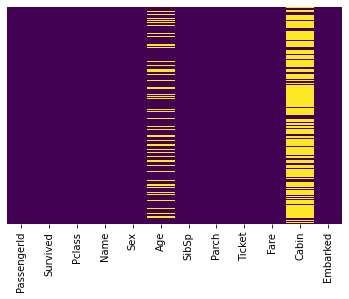

In [7]:
# It is the best method to check the null values rather using the above code
sns.heatmap(train.isnull(),yticklabels=False,cbar=False,cmap='viridis')

Roughly 20% of the age data is missing. The proportion of Age is likely enough for reasonable replacement with some form of imputation. looking at Cabin column, it looks like we are missing too much of that data to do something useful with at a basic level. we'll probaly drop this later, or change it in to another feature like "Cabin Known:1 or 0"

Let's continue by visualizing some more of the data!

<AxesSubplot:xlabel='Survived', ylabel='count'>

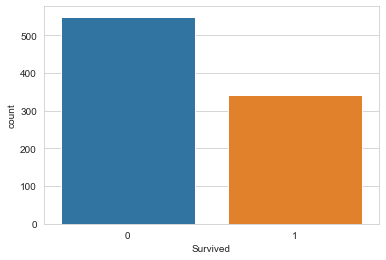

In [8]:
sns.set_style('whitegrid')
sns.countplot(x = 'Survived',data = train)

<AxesSubplot:xlabel='Survived', ylabel='count'>

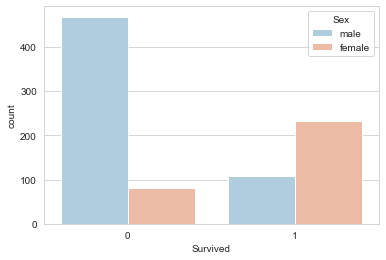

In [9]:
sns.set_style('whitegrid')
sns.countplot(x = 'Survived',hue = 'Sex', data = train, palette = 'RdBu_r')

<AxesSubplot:xlabel='Survived', ylabel='count'>

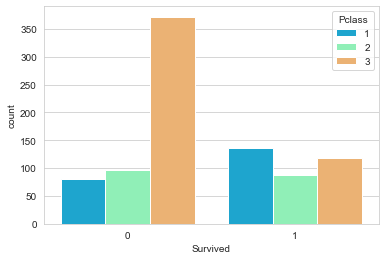

In [10]:
sns.set_style('whitegrid')
sns.countplot(x = 'Survived',hue = 'Pclass', data = train, palette = 'rainbow')

F:\My Work\3RI Technologies\Anaconda3\envs\machinelearning\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Age'>

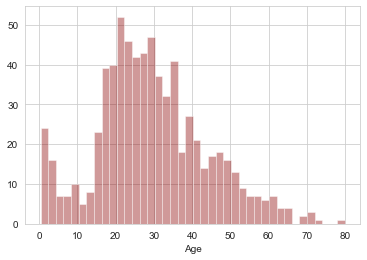

In [11]:
sns.distplot(train['Age'].dropna(),kde=False,color='darkred',bins=40)

<AxesSubplot:>

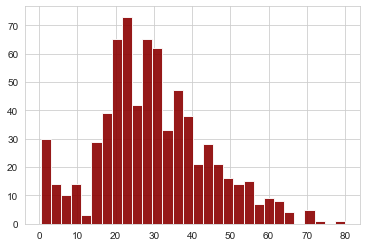

In [12]:
train['Age'].hist(bins=30,color='darkred',alpha=0.9)

<AxesSubplot:xlabel='SibSp', ylabel='count'>

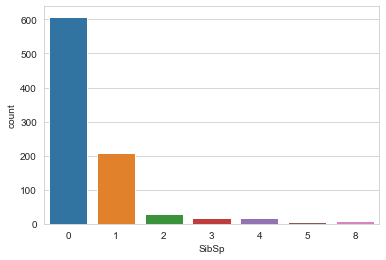

In [13]:
sns.countplot(x='SibSp',data = train)

<AxesSubplot:>

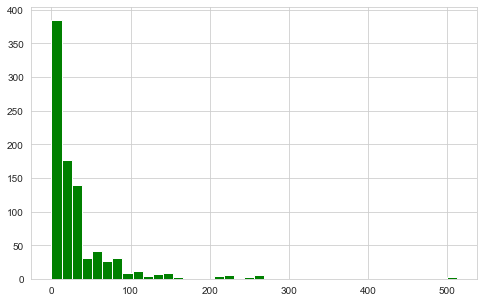

In [14]:
train['Fare'].hist(color='green',bins=40,figsize=(8,5))

## Data Cleaning

we want to fill the missing age data instead of just dropping the missing age data rows. One way, to do this is by filling in the mean age of all the passengers(imputation). However we can be smarter about this and check the average age by passenger class.

<AxesSubplot:xlabel='Pclass', ylabel='Age'>

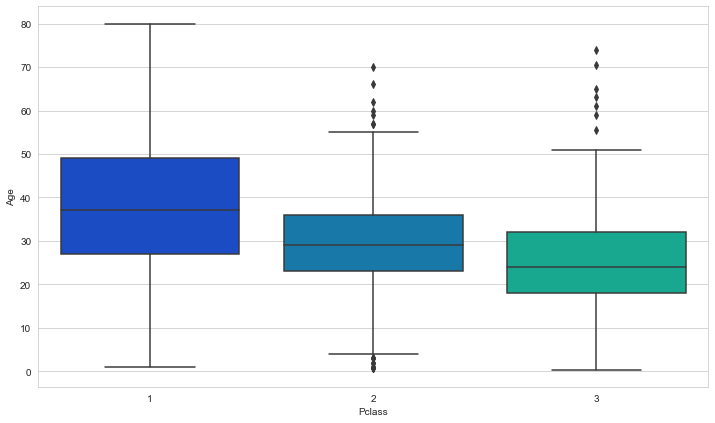

In [15]:
plt.figure(figsize=(12,7))
sns.boxplot(x='Pclass',y='Age',data=train,palette='winter') #the boxplot will show the average age of each passsenger class

Now we can put the average age in the null value of passenger class

In [16]:
def input_age(cols):
    Age = cols[0]
    Pclass = cols[1]
    
    if pd.isnull(Age):
        
        if Pclass == 1:
            return 37
        elif Pclass ==2:
            return 29
        else:
            return 24
    else:
        return Age

Now we can apply that function below

In [20]:
# we can replace the average values of age in placeof null values in the age column
train['Age'] = train[['Age','Pclass']].apply(input_age,axis=1)

<AxesSubplot:>

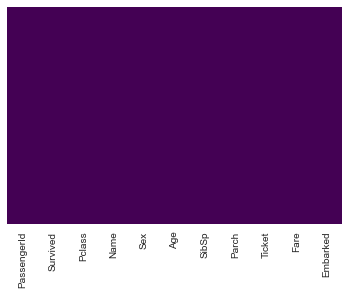

In [29]:
# Now we can check the null valus in the age column by using heatmap
sns.heatmap(train.isnull(),yticklabels=False,cbar=False,cmap='viridis')

As there is a huge null values in the cabin column so we can drop the column

In [21]:
train.drop('Cabin',axis=1,inplace=True )

In [30]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [31]:
train.dropna(inplace=True)

In [32]:
train.shape

(889, 11)

## Converting Categorical Features

We need to convert the categorical features to dummy variables using Pandas! Otherwise our machine learning algorithm won't able to work to directly take in those features as inputs.

In [34]:
pd.get_dummies(train['Sex'])

,female,male
0,0,1
1,1,0
2,1,0
3,1,0
4,0,1
...,...,...
886,0,1
887,1,0
888,1,0
889,0,1


In [36]:
sex = pd.get_dummies(train['Sex'],drop_first=True)
sex.head()

,male
0,1
1,0
2,0
3,0
4,1


In [37]:
embark = pd.get_dummies(train['Embarked'])
embark.head()

,C,Q,S
0,0,0,1
1,1,0,0
2,0,0,1
3,0,0,1
4,0,0,1


In [38]:
embark = pd.get_dummies(train['Embarked'],drop_first=True)
embark.head()

,Q,S
0,0,1
1,0,0
2,0,1
3,0,1
4,0,1


In [39]:
Pcl = pd.get_dummies(train['Pclass'],drop_first=True)
Pcl.head()

,2,3
0,0,1
1,0,0
2,0,1
3,0,0
4,0,1


In [40]:
data = pd.concat([train,sex,embark,Pcl],axis=1)

In [41]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,male,Q,S,2,3
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,1,0,1,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,0,0,0,0,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,0,0,1,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,0,0,1,0,0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,1,0,1,0,1


In [42]:
data.drop(['Sex','Embarked','PassengerId','Name','Ticket'],axis=1,inplace=True)

In [43]:
data.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S,2,3
0,0,3,22.0,1,0,7.2500,1,0,1,0,1
1,1,1,38.0,1,0,71.2833,0,0,0,0,0
2,1,3,26.0,0,0,7.9250,0,0,1,0,1
3,1,1,35.0,1,0,53.1000,0,0,1,0,0
4,0,3,35.0,0,0,8.0500,1,0,1,0,1


## Applying machine learning model

### Training the dataset

#### Logistic Regression

In [49]:
X = data.drop("Survived",axis=1)
y = data["Survived"]

In [50]:
#spliting the data
from sklearn.model_selection import train_test_split

In [51]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

In [52]:
from sklearn.linear_model import LogisticRegression

In [53]:
logmodel=LogisticRegression()

In [54]:
logmodel.fit(X_train,y_train)

F:\My Work\3RI Technologies\Anaconda3\envs\machinelearning\lib\site-packages\sklearn\utils\validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
F:\My Work\3RI Technologies\Anaconda3\envs\machinelearning\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [58]:
predictions = logmodel.predict(X_test)

F:\My Work\3RI Technologies\Anaconda3\envs\machinelearning\lib\site-packages\sklearn\utils\validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(


In [55]:
from sklearn.metrics import classification_report

In [59]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.87      0.87      0.87       166
           1       0.78      0.78      0.78       101

    accuracy                           0.84       267
   macro avg       0.82      0.82      0.82       267
weighted avg       0.84      0.84      0.84       267



In [60]:
classification_report(y_test,predictions)

'              precision    recall  f1-score   support\n\n           0       0.87      0.87      0.87       166\n           1       0.78      0.78      0.78       101\n\n    accuracy                           0.84       267\n   macro avg       0.82      0.82      0.82       267\nweighted avg       0.84      0.84      0.84       267\n'

In [61]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,predictions)


array([[144,  22],
       [ 22,  79]], dtype=int64)

In [63]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,predictions)

0.8352059925093633